In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the csv file
data = pd.read_csv('../Assignment_data/Data_Q1/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [5]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [6]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [7]:
from sklearn.preprocessing import Imputer

#When the data is NULL replace NULL with median
imputer = Imputer(strategy="median")

In [8]:
#For training data
Y_train = pd.DataFrame(train_set.median_house_value)
imputer.fit(Y_train)
Y = imputer.transform(Y_train)
m = len(Y)

#Forming an array without the columns "median_house_value", "ocean_proximity"
X_train = train_set.drop(["median_house_value", "ocean_proximity"], axis=1)
imputer.fit(X_train)
X = imputer.transform(X_train)
dim = len(X[0])

In [9]:
#For test data
Y_test = pd.DataFrame(test_set.median_house_value)
imputer.fit(Y_test)
test_labels = imputer.transform(Y_test)
m_test = len(test_labels)

#Forming an array without the columns "median_house_value", "ocean_proximity"
X_test = test_set.drop(["median_house_value", "ocean_proximity"], axis=1)
imputer.fit(X_test)
test_data = imputer.transform(X_test)

In [16]:
#For finding the optimal alpha or lambda
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lambda_history = []
rmse_history = []
rmse_opt = float('Inf')
lambda_opt = 0
for i in range(1000):
    lasso_regression = Lasso(alpha=i+1)
    lasso_regression.fit(X,Y)
    lasso_regression.coef_
    testlabel_predictions = lasso_regression.predict(test_data)
    
    lambda_history.append(i+1)
    
    mse = mean_squared_error(test_labels,testlabel_predictions)
    rmse = np.sqrt(mse)
    rmse_history.append(rmse)
    
    if(rmse_opt>rmse):
        rmse_opt=rmse
        lambda_opt=i+1
    
    i=i+8

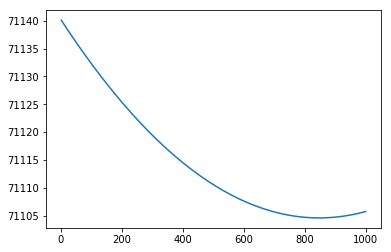

In [17]:
plt.plot(lambda_history, rmse_history)

In [18]:
%%time
print (lambda_opt)
print (rmse_opt)

#Finding the co-efficient matrix using Lasso regression(alpha = lambda_opt)
lasso_opt_regression = Lasso(alpha=lambda_opt)
lasso_opt_regression.fit(X,Y)
print (lasso_opt_regression.coef_)
testlabel_opt_predictions = lasso_opt_regression.predict(test_data)
print (testlabel_opt_predictions)

847
71104.576572109
[-3.94892608e+04 -3.95135294e+04  1.22679712e+03 -8.45411820e+00
  1.11591268e+02 -3.86268299e+01  5.38040186e+01  4.06810813e+04]
[ 65244.2789939  153350.30679832 254252.82428611 ... 437018.59934664
 133535.49540862 174505.20923742]
CPU times: user 178 ms, sys: 6.04 ms, total: 184 ms
Wall time: 175 ms


Now varying alpha to observe the changes in theta and the training times

In [15]:
%%time

#Finding the co-efficient matrix using Lasso regression(alpha = 10000)
lasso_regression1 = Lasso(alpha=10000)
lasso_regression1.fit(X,Y)

CPU times: user 180 ms, sys: 4.11 ms, total: 184 ms
Wall time: 183 ms


In [18]:
lasso_regression1.coef_

array([-5.52334748e+03, -7.78004142e+03,  1.70214381e+03, -1.13308927e+01,
        6.11453263e+01, -4.00807388e+01,  1.34428912e+02,  4.22231125e+04])

In [21]:
%%time
#Finding the co-efficient matrix using Lasso regression
lasso_regression2 = Lasso(alpha=0.5)
lasso_regression2.fit(X,Y)

CPU times: user 313 ms, sys: 89.7 ms, total: 403 ms
Wall time: 300 ms


In [24]:
lasso_regression2.coef_

array([-4.26305363e+04, -4.24483384e+04,  1.18283562e+03, -8.18813415e+00,
        1.16257371e+02, -3.84922926e+01,  4.63469769e+01,  4.05384886e+04])

In [27]:
#Predicting the test labels
testlabel_predictions1 = lasso_regression1.predict(test_data)
testlabel_predictions2 = lasso_regression2.predict(test_data)

In [30]:
#Finding root mean square error for the test labels and the predicted test labels

mse1 = mean_squared_error(test_labels,testlabel_predictions1)
rmse1 = np.sqrt(mse1)
print rmse1

mse2 = mean_squared_error(test_labels,testlabel_predictions2)
rmse2 = np.sqrt(mse2)
print rmse2

75144.06253730216
71140.13129109403
